# 股票预测器

说明:使用线性回归模型,预测收盘价

最终迭代完之后损失值为:0.06777878446404059
最终的theta为：array([[ 5.56921653e+01],
       [ 3.47193832e+00],
       [ 3.45042405e+00],
       [ 3.39887827e+00],
       [-1.73918511e-02]])
正确个数:800
训练集的正确率为:1.0
正确个数:209
测试集的正确率为:1.0


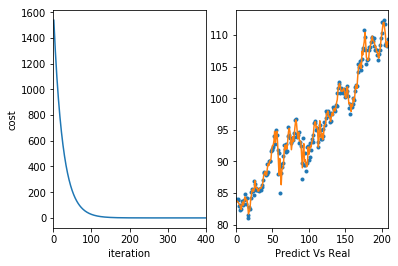

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import math
from copy import deepcopy

f, ax = plt.subplots(1,2)

#数据处理
def dataHandle():
    csv_data = pd.read_csv("msft_stockprices_dataset.csv")
#     #将close price这列设为结果集
    yset  = np.array(csv_data["Close Price"]).reshape(-1,1)
    #取变量集
     #去掉第一列 Date
    date_list = csv_data["Date"]
    csv_data = csv_data.drop(csv_data.columns[0],axis = 1,inplace=False)
    data = np.array(csv_data)
    #去掉close price
    xset = np.delete(data,3,1);
    return (xset,yset,np.array(date_list))


    
#数据归一化处理
def data_nomalization(x):
    std = np.std(x,axis=0) #标准差
    mean = np.mean(x,axis=0) #均值
    return ((x-mean)/std,mean,std)

#定义梯度下降
#params: 
#xset: 变量集
#yset: 结果集
#alpha:步长
#threshold： 阈值
def gradient_descent(xset,yset,alpha,theta):
    x_dimention = np.size(xset, axis=1) #x的维度 即n
    sample_cnt =  np.size(xset, axis=0)  #样本总个数 即m
    theta = theta - alpha/sample_cnt*(np.dot(xset.transpose(), (np.dot(xset,theta)-yset)))
    return theta

 #定义损失函数
def cost_function(xset,yset,theta):
    x_dimention = np.size(xset, axis=1) #x的维度 即n
    sample_cnt =  np.size(xset, axis=0)  #样本总个数 即m
    cost = np.sum(np.square(np.dot(xset,theta)-yset))*0.5/sample_cnt
    
   # print("cost is :"+repr(cost))
    return cost


#定义训练方法
def train(x,y):
    x_dimention = np.size(x, axis=1) #x的维度 即n
    theta = np.zeros((x_dimention,1))#创建theta矩阵,like[[theta1],[theta2]....[theta_n]]
    
    #开始训练
    cost_plot =list()
    num_iters = 400 #迭代次数
    alpha = 0.02 #步长
    iteration = range(1,num_iters)
    for i in  iteration:
        theta = sub_train(x,y,theta,alpha)
        cost = cost_function(x,y,theta)
        cost_plot.append(cost)
    
    print("最终迭代完之后损失值为:"+repr(cost))
    #画出损失变化图
    plt.sca(ax[0])
    plt.xlim(0, num_iters)
    plt.plot(iteration,cost_plot)
    plt.xlabel('iteration')
    plt.ylabel('cost')
    return theta
    
def sub_train(x,y,theta,alpha):
    theta =  gradient_descent(x,y,alpha,theta) 
    return theta


#定义计算正确率
def cal_accurancy(x,y,theta):
    #容错率为5%
    error_tolerance = np.fabs(y*0.05)
    sample_cnt = np.size(y,axis=0)
    #计算在容错率范围之类的正确个数
   # print(np.fabs(np.dot(x,theta)-y))

    correct_num = np.sum(np.fabs((np.dot(x,theta)-y)) < error_tolerance)
    print("正确个数:"+repr(correct_num))
    ratio = correct_num/sample_cnt
    return ratio

#预测
def pred(x,theta):
    return np.dot(x,theta)
    
    
def main():
    #数据处理，得到变量集和结果集
    xset,yset,date_list = dataHandle()
    
    #将数据分为测试集合训练集
    train_x = xset[:800]
    test_x = xset[800:]
    
    train_y = yset[:800]
    test_y = yset[800:]
    
   # print(date_list)
    test_date_list = date_list[800:]
    

    
      #数据归一化处理
    train_x,mean,std = data_nomalization(train_x)
    #在前面加一列1。这么做的目的是是X0为1.即a对应的变量x为1，统一函数格式。
    train_x = np.insert(train_x,0,1,axis=1) 
    
    theta = train(train_x,train_y)
    print("最终的theta为："+repr(theta))
    
    #验证训练集
    ratio = cal_accurancy(train_x,train_y,theta)
    print("训练集的正确率为:"+str(ratio))
    
    #验证测试集
    test_x = (test_x-mean)/std
    test_x = np.insert(test_x,0,1,axis=1)
    ratio_test = cal_accurancy(test_x,test_y,theta)
    print("测试集的正确率为:"+str(ratio_test)) 
    
    #预测
    pred_y = pred(test_x,theta)
    
    #画出实际图与预测图
    test_size = np.size(test_y,axis=0)
    x_range = np.arange(0,test_size)
    plt.sca(ax[1])
    plt.xlim(0,test_size)
    plt.plot(x_range,test_y,".")
    plt.plot(x_range,pred_y)
    plt.xlabel("Predict Vs Real")
    
main() 

使用sklearn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import time

def formatDateColumn(date_list):
    new_date_list = []
    for column in date_list:
       # newdate =time.mktime(time.strptime(column, "%Y/%m/%d %H:%M %p"))
        newdate =time.mktime(time.strptime(column, "%Y-%m-%d %H:%M:%S"))

        new_date_list.append(newdate)
    return new_date_list

#读取文件
csv_data = pd.read_csv("msft_stockprices_dataset.csv")
#将数据分 为训练集合测试集
X_train,X_test = train_test_split(csv_data,test_size = 0.01, random_state = int(time.time()))
# Y_train = X_train[:,4].reshape(-1,1)
# X_train = np.delete(X_train,-2,1).reshape(-1,5)

Y_train = X_train["Close Price"]
Y_train = np.array(Y_train).reshape(-1,1)

date_list = np.array(X_train["Date"])
X_train["Date"] = formatDateColumn(date_list)
X_train = np.array(X_train,dtype=None) 
X_train = np.delete(X_train,-2,1).reshape(-1,5)

Y_test = X_test["Close Price"]
Y_test = np.array(Y_test).reshape(-1,1)

date_list = np.array(X_test["Date"])
X_test["Date"] = formatDateColumn(date_list)
X_test = np.array(X_test,dtype=None)
X_test = np.delete(X_test,-2,1).reshape(-1,5)

#print(X_test)
#print(Y_test)
#构建模型
regr = LinearRegression(fit_intercept=True,normalize=False,copy_X=True,n_jobs=1)
#训练
regr.fit(X=X_train,y=Y_train,sample_weight=None)

#用训练的模型进行预测
pred = regr.predict(X=X_test)